In [1]:
#import the libraries needed
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. Look into the dates for each column to drop rows that are not in the other datasets. 

After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = pd.read_csv('Whale_returns.csv', index_col = 'Date', parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = pd.read_csv('Algo_returns.csv', index_col = 'Date', parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv('Sp500_history.csv', index_col = 'Date', infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history['Close'].dtype

dtype('O')

In [10]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace("$","")
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_history = sp500_history.pct_change()
sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_history.dropna()
sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Rename Column 
sp500_history.columns = ['SPReturns']
sp500_history.tail()

,SPReturns
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame and drop nulls
all_pfolios = pd.concat([sp500_history, algo_returns, whale_returns], axis='columns', join='inner', sort=True)
all_pfolios = all_pfolios.dropna()
all_pfolios.head()

,SPReturns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

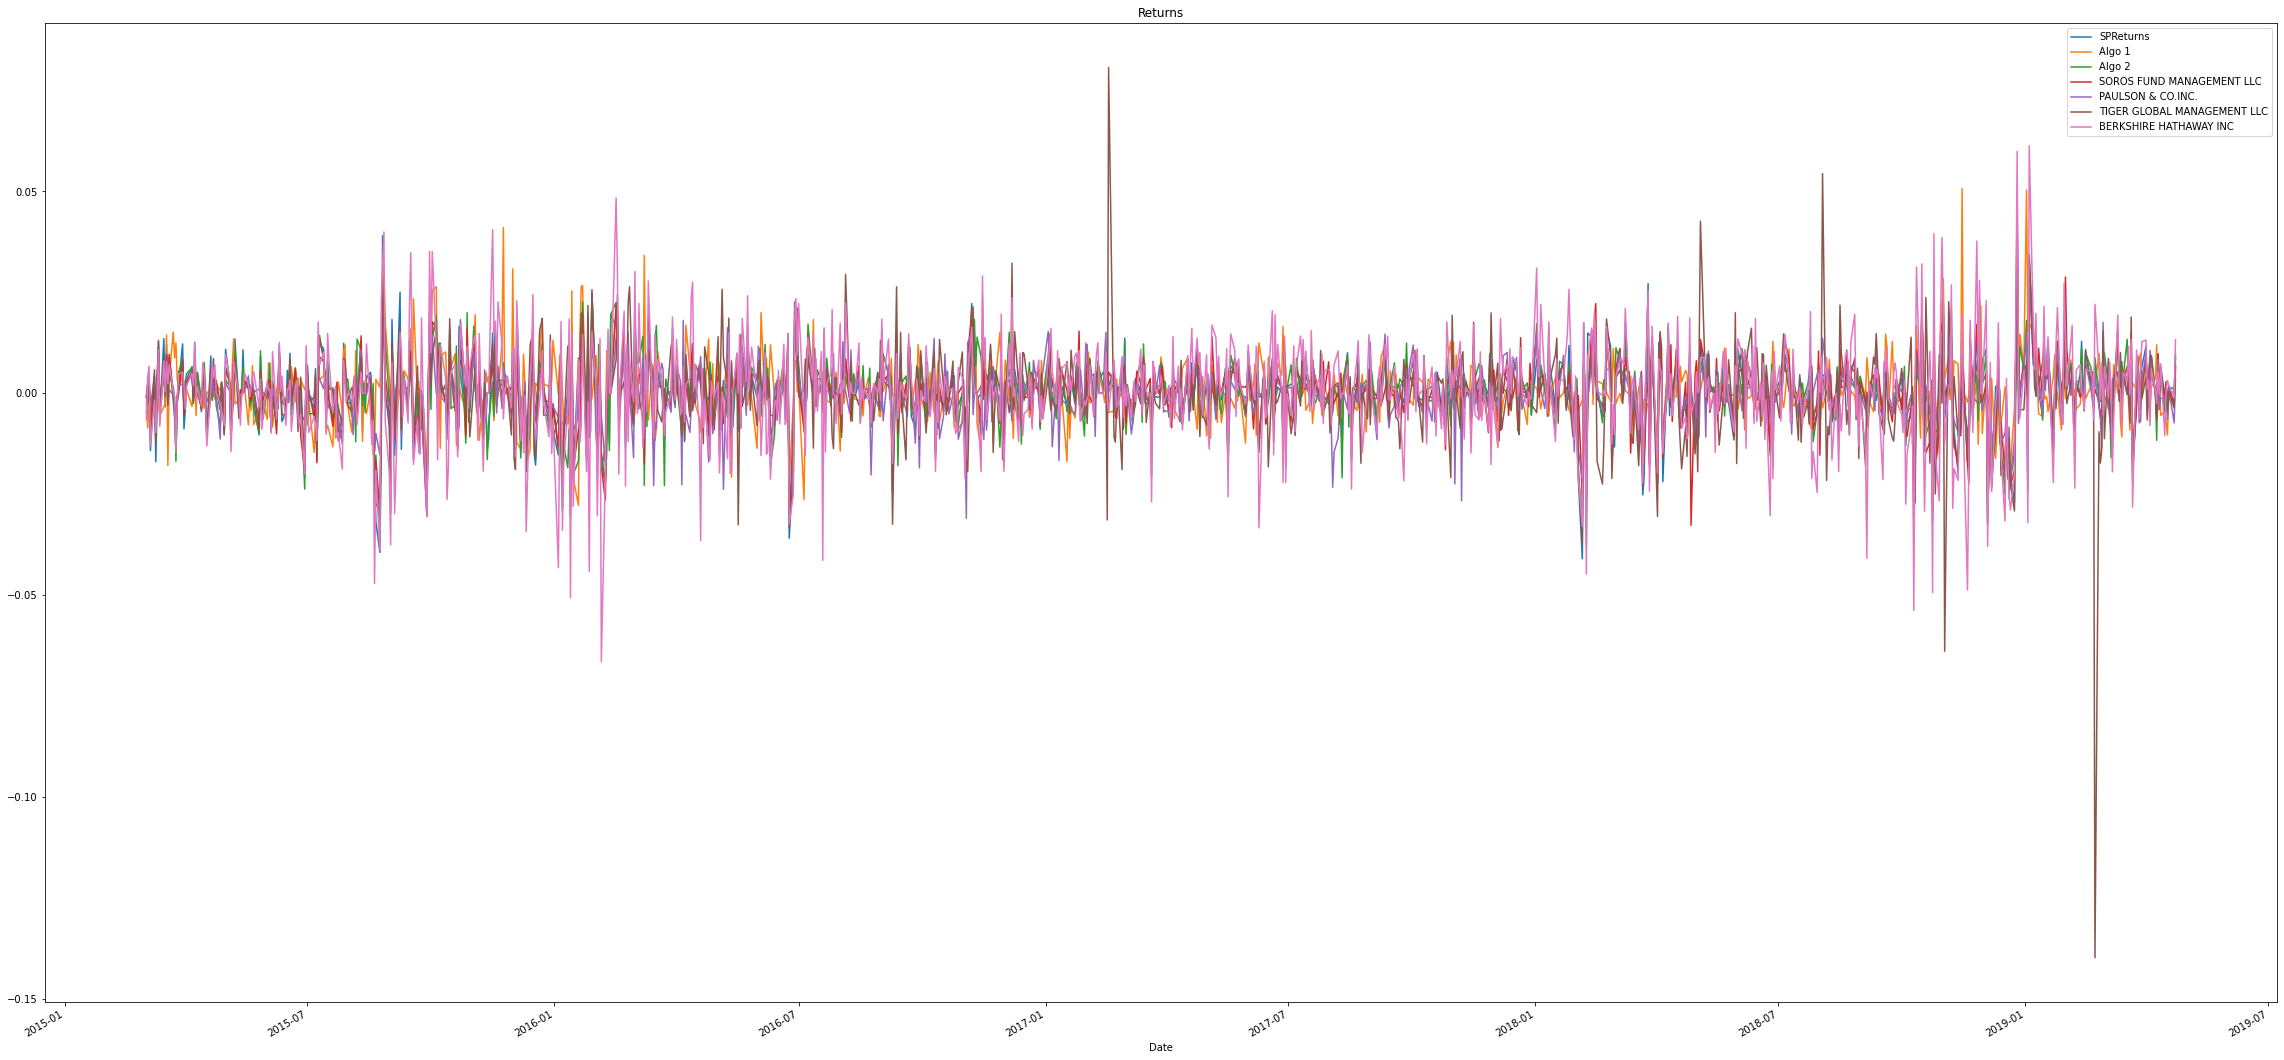

In [15]:
# Plot daily returns
all_pfolios.plot(figsize=(40, 20), title = 'Returns')

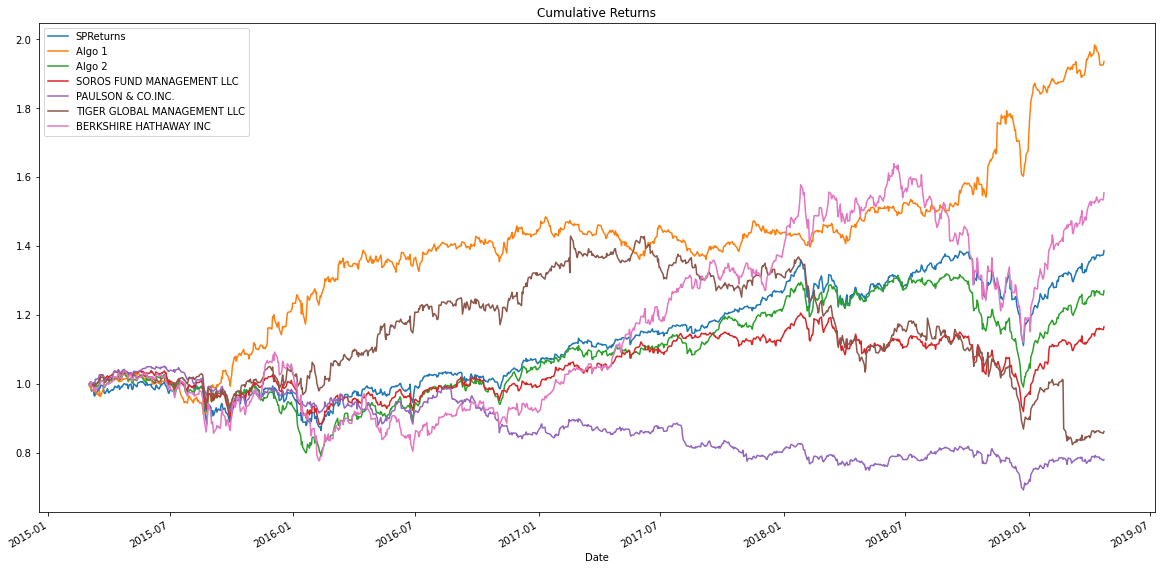

In [16]:
# Plot cumulative returns
cumulative_returns = (1 + all_pfolios).cumprod()
cumulative_returns.plot(figsize=(20, 10), title = 'Cumulative Returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

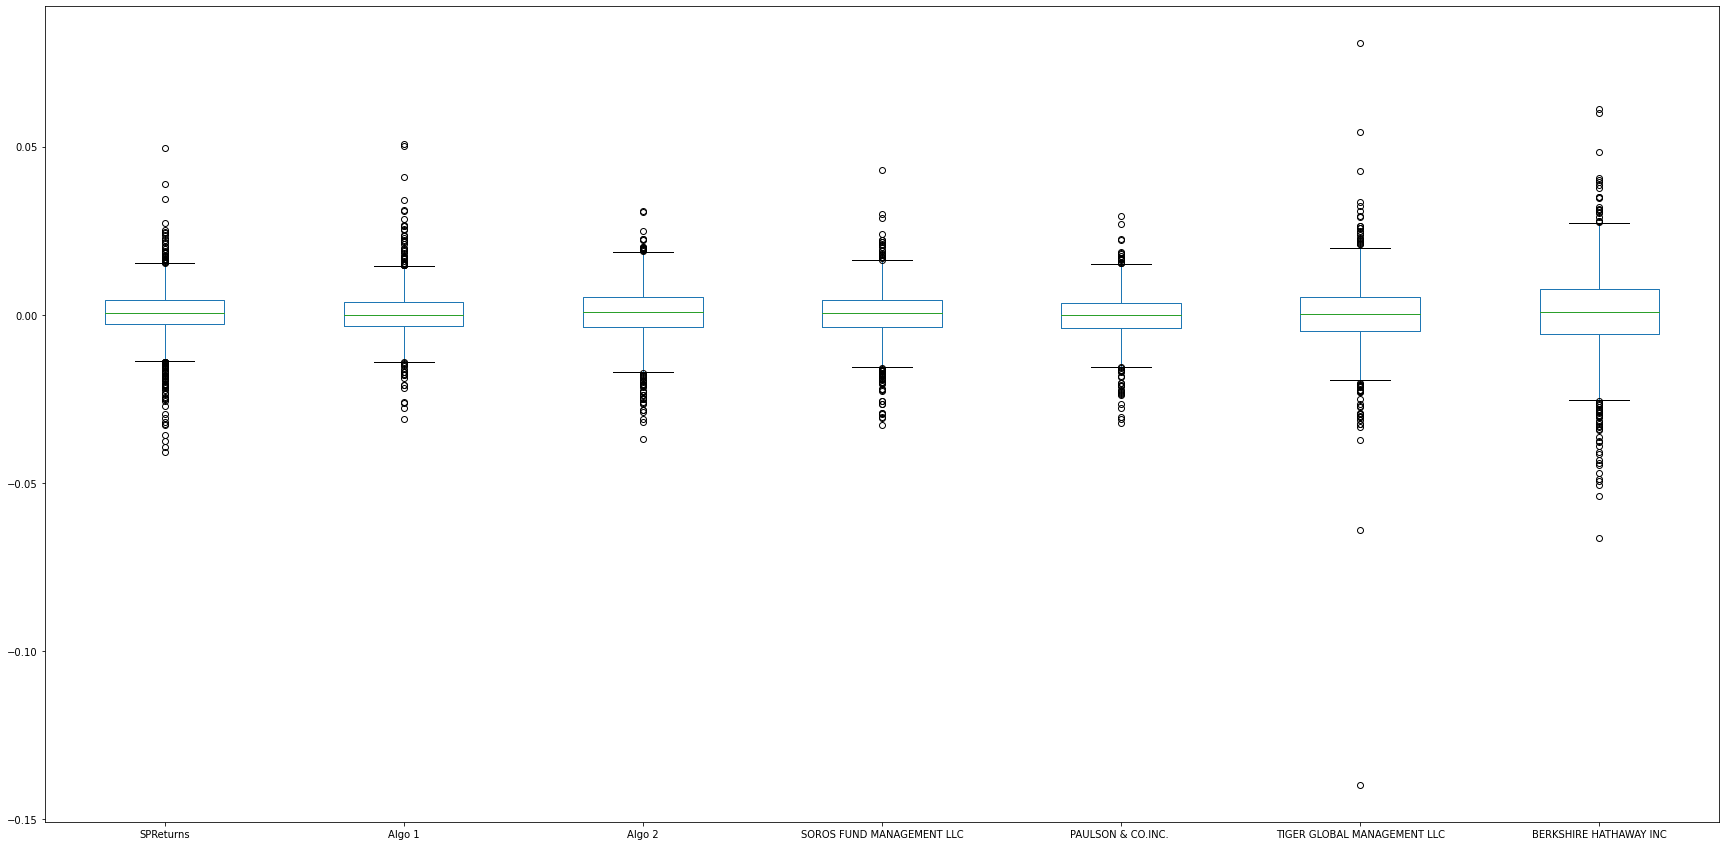

In [17]:
# Box plot to visually show risk
all_pfolios.plot(kind='box', legend = True, figsize =(30,15))

In [18]:
# Daily Standard Deviations
all_pfolios_std = all_pfolios.std()
all_pfolios_std

SPReturns                      0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
sp500risk = all_pfolios['SPReturns'].std()
all_pfolios.std() > sp500risk

SPReturns                      False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [20]:
# Calculate the annualized standard deviation (252 trading days)
all_pfolios_std_annum = all_pfolios.std() * np.sqrt(252)
all_pfolios_std_annum

SPReturns                      0.135786
Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

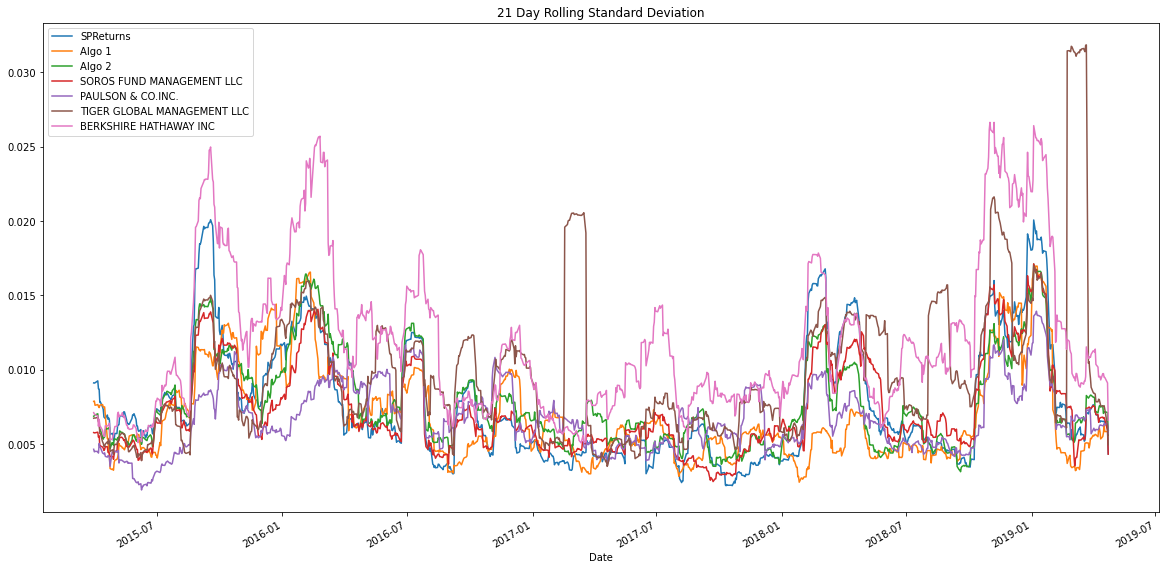

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
SPReturns_21MA = all_pfolios.rolling(21).std()
SPReturns_21MA.plot(figsize=(20, 10), title = '21 Day Rolling Standard Deviation')

In [22]:
# Construct a correlation table
correlation = all_pfolios.corr()
correlation

,SPReturns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SPReturns,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751371,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


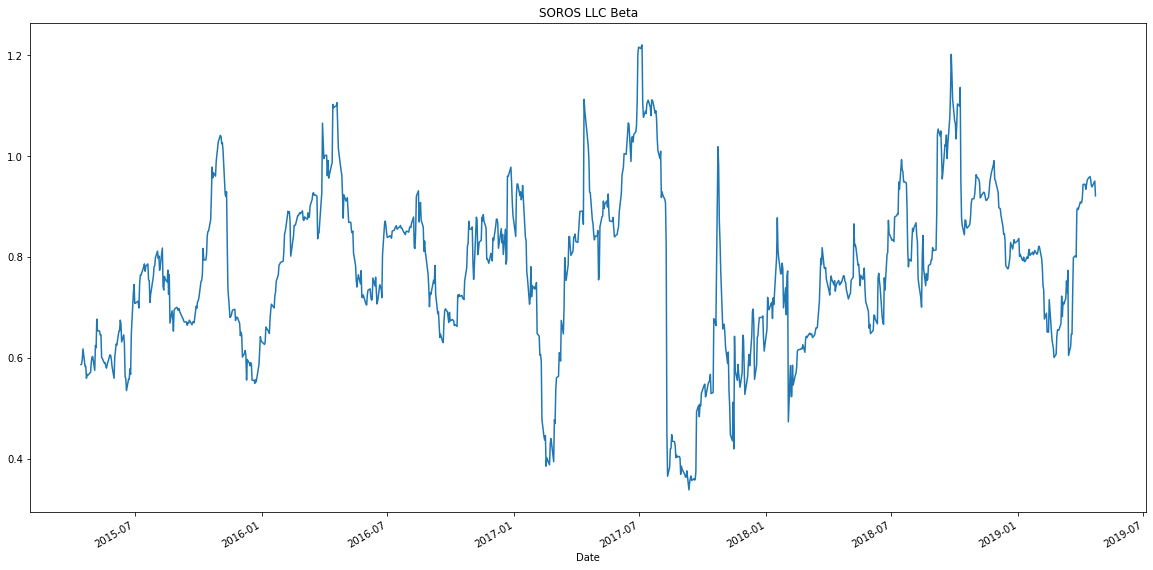

In [23]:
# Calculating Beta for SOROS FUND MANAGEMENT LLC compared to the total market (S&P 500)
varSP = all_pfolios['SPReturns'].rolling(window = 30).var()
cov_soros = all_pfolios['SOROS FUND MANAGEMENT LLC'].rolling(window = 30).cov(all_pfolios['SPReturns'])
beta_soros = cov_soros/varSP
beta_soros.plot(figsize=(20, 10), title = 'SOROS LLC Beta')


[]

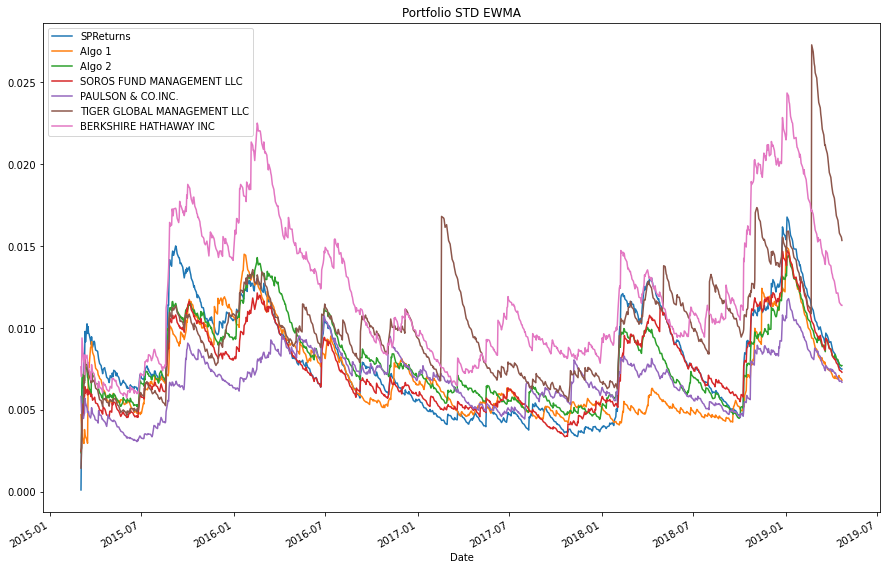

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
all_pfolios_ewm = all_pfolios.ewm(halflife=21).std().plot(figsize=(15,10), title="Portfolio STD EWMA")
all_pfolios_ewm.plot(figsize=(20, 10), title = 'EWMA Portfolios STD')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
all_sharpe_ratios = (all_pfolios.mean() * 252) / (all_pfolios.std()* np.sqrt(252))
all_sharpe_ratios

SPReturns                      0.648267
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

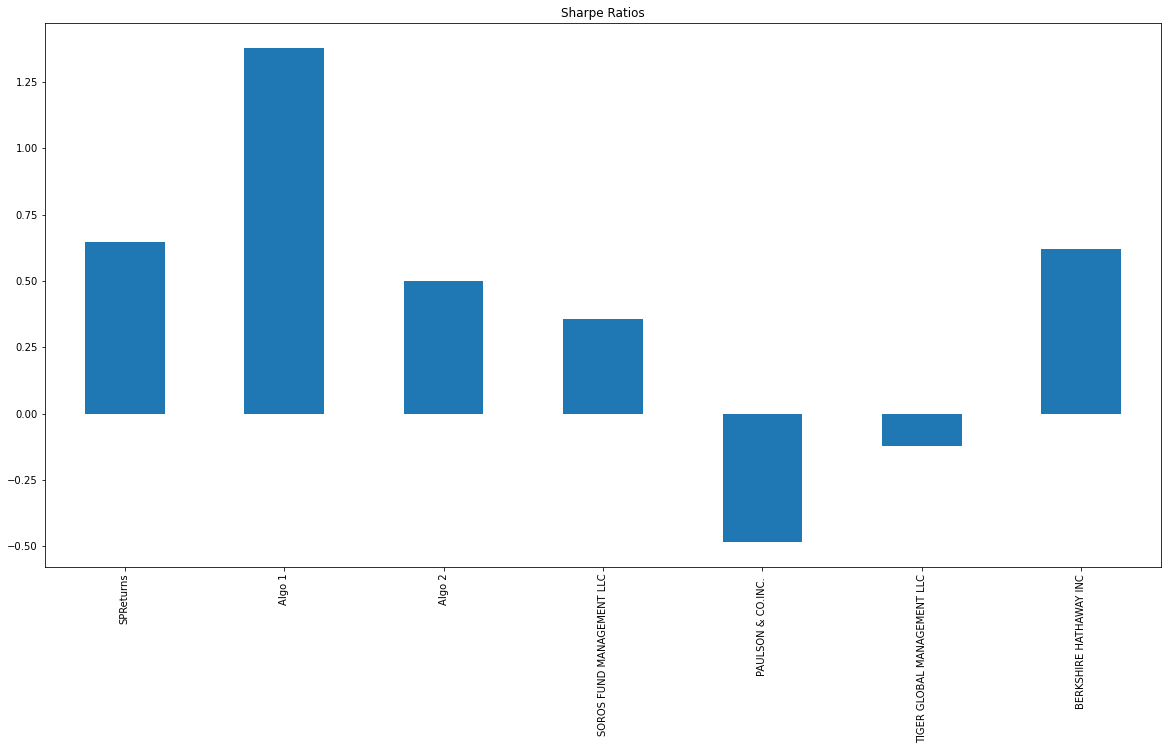

In [26]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(figsize=(20, 10), title = 'Sharpe Ratios', kind='bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
# Make sure dates are the same as previous data
tsla = pd.read_csv('stock_data - TSLA.csv', index_col = 'Date').rename(columns = {'Close': 'TSLA'})
tsla.index = pd.to_datetime(tsla.index)
tsla.head()

,TSLA
Date,
2015-03-02,39.47
2015-03-03,39.91
2015-03-04,40.49
2015-03-05,40.13
2015-03-06,38.78


In [28]:
# Read the second stock
unil = pd.read_csv('stock_data - UN.csv', index_col='Date').rename(columns = {'Close': 'UN'})
unil.index = pd.to_datetime(unil.index)
unil.head()

,UN
Date,
2015-03-02,43.76
2015-03-03,43.64
2015-03-04,43.46
2015-03-05,43.94
2015-03-06,42.79


In [29]:
# Read the third stock
pg = pd.read_csv('stock_data - PG.csv', index_col='Date').rename(columns = {'Close': 'PG'})
pg.index = pd.to_datetime(pg.index)
pg.head()

,PG
Date,
2015-03-02,85.41
2015-03-03,85.16
2015-03-04,84.35
2015-03-05,84.63
2015-03-06,82.66


In [30]:
# Read the fourth stock
ftr = pd.read_csv('stock_data - FTR.csv', index_col='Date').rename(columns = {'Close': 'FTR'})
ftr.index = pd.to_datetime(ftr.index)
ftr.head()

,FTR
Date,
2015-03-02,142.67
2015-03-03,141.68
2015-03-04,140.91
2015-03-05,141.85
2015-03-06,137.11


In [31]:
# Concatenate all stocks into a single DataFrame
all_mystocks = pd.concat([tsla, unil, pg, ftr], axis='columns',join='inner')
all_mystocks.head()

,TSLA,UN,PG,FTR
Date,,,,
2015-03-02,39.47,43.76,85.41,142.67
2015-03-03,39.91,43.64,85.16,141.68
2015-03-04,40.49,43.46,84.35,140.91
2015-03-05,40.13,43.94,84.63,141.85
2015-03-06,38.78,42.79,82.66,137.11


In [32]:
#daily returns of the 4 stocks 
all_mystocks = all_mystocks.pct_change()
all_mystocks

,TSLA,UN,PG,FTR
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,0.011148,-0.002742,-0.002927,-0.006939
2015-03-04,0.014533,-0.004125,-0.009512,-0.005435
2015-03-05,-0.008891,0.011045,0.003320,0.006671
2015-03-06,-0.033641,-0.026172,-0.023278,-0.033416
...,...,...,...,...
2016-04-06,0.038951,0.010277,0.007816,0.009054
2016-04-07,-0.030897,-0.008403,-0.006801,-0.008209
2016-04-08,-0.027799,0.000446,-0.000481,0.001604


In [33]:
#drop NAs of daily returns
all_mystocks = all_mystocks.dropna()
all_mystocks

,TSLA,UN,PG,FTR
Date,,,,
2015-03-03,0.011148,-0.002742,-0.002927,-0.006939
2015-03-04,0.014533,-0.004125,-0.009512,-0.005435
2015-03-05,-0.008891,0.011045,0.003320,0.006671
2015-03-06,-0.033641,-0.026172,-0.023278,-0.033416
2015-03-09,-0.015472,-0.005141,0.005202,0.011669
...,...,...,...,...
2016-04-06,0.038951,0.010277,0.007816,0.009054
2016-04-07,-0.030897,-0.008403,-0.006801,-0.008209
2016-04-08,-0.027799,0.000446,-0.000481,0.001604


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/4, 1/4, 1/4, 1/4]
mypfolio = all_mystocks.dot(weights)
mypfolio = mypfolio.to_frame('My Portfolio')
mypfolio

,My Portfolio
Date,
2015-03-03,-0.000365
2015-03-04,-0.001135
2015-03-05,0.003036
2015-03-06,-0.029127
2015-03-09,-0.000935
...,...
2016-04-06,0.016524
2016-04-07,-0.013577
2016-04-08,-0.006557


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_pfolios['My Portfolio'] = mypfolio
all_pfolios.head()

,SPReturns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,My Portfolio
Date,,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.000365
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001135
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.003036
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.029127
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.000935


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_pfolios = all_pfolios.dropna()

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
all_pfolios_std_annum = all_pfolios.std()* np.sqrt(252)
all_pfolios_std_annum

SPReturns                      0.163012
Algo 1                         0.152136
Algo 2                         0.159393
SOROS FUND MANAGEMENT LLC      0.139130
PAULSON & CO.INC.              0.108399
TIGER GLOBAL MANAGEMENT LLC    0.147790
BERKSHIRE HATHAWAY INC         0.232867
My Portfolio                   0.181455
dtype: float64

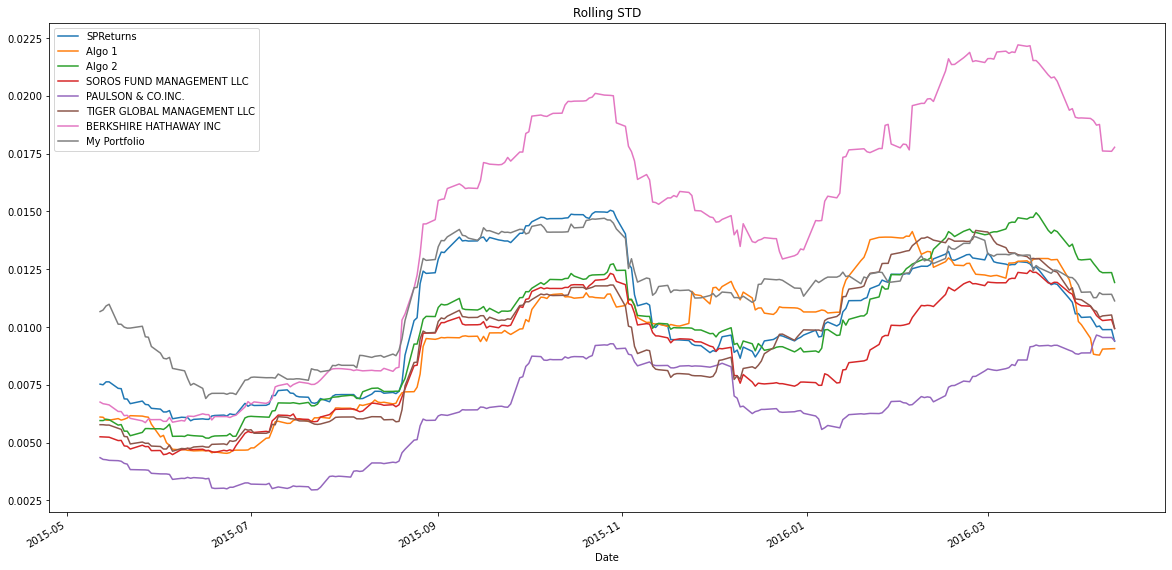

In [38]:
# Rolling
rolling_all = all_pfolios.rolling(50).std()
rolling_all.plot(figsize=(20, 10), title = 'Rolling STD')

In [39]:
# Annualized Sharpe Ratios
all_sharpe_ratios['My Portfolio'] = (all_pfolios['My Portfolio'].mean() * 252) / (all_pfolios['My Portfolio'].std()* np.sqrt(252))
all_sharpe_ratios

SPReturns                      0.648267
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
My Portfolio                   0.593163
dtype: float64

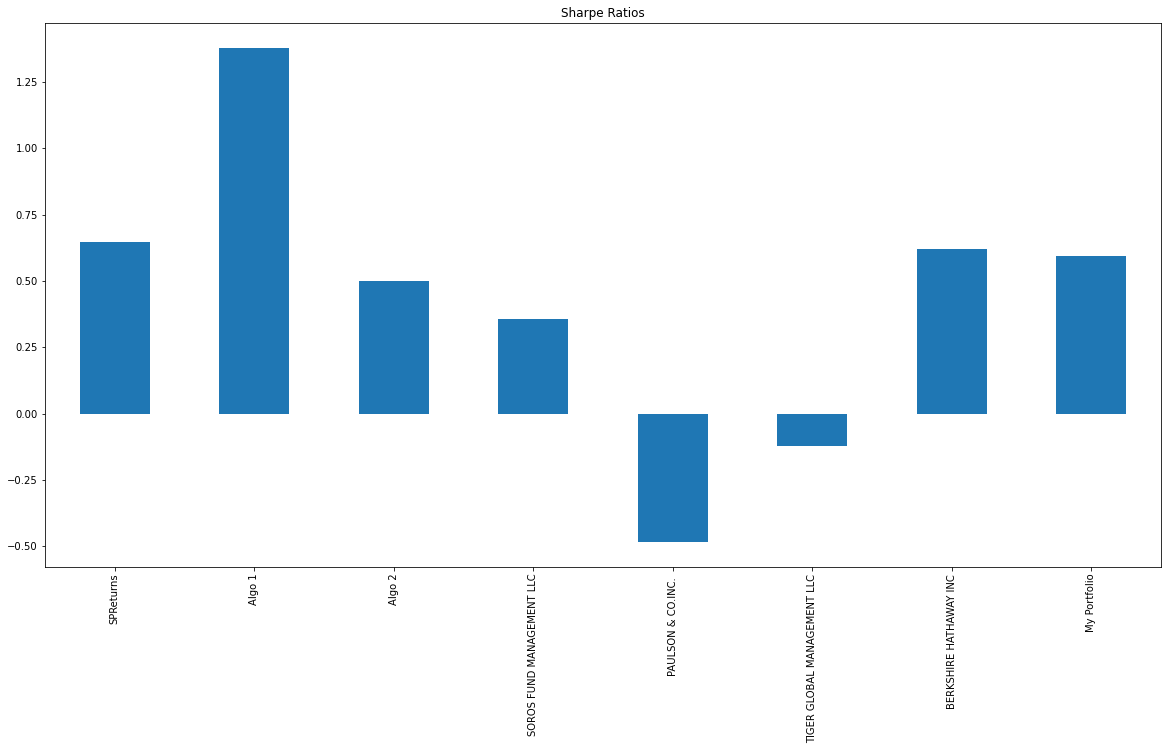

In [40]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(figsize=(20, 10), title = 'Sharpe Ratios', kind='bar')

In [41]:
# Create a correlation analysis
correlation2 = all_pfolios.corr()
correlation2

,SPReturns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,My Portfolio
SPReturns,1.000000,0.320305,0.855571,0.880383,0.711911,0.863155,0.736809,0.791034
Algo 1,0.320305,1.000000,0.336315,0.406620,0.309029,0.330397,0.375153,0.256373
Algo 2,0.855571,0.336315,1.000000,0.885268,0.691407,0.740572,0.681857,0.648189
SOROS FUND MANAGEMENT LLC,0.880383,0.406620,0.885268,1.000000,0.801147,0.799995,0.768492,0.678594
PAULSON & CO.INC.,0.711911,0.309029,0.691407,0.801147,1.000000,0.668547,0.607101,0.532004
TIGER GLOBAL MANAGEMENT LLC,0.863155,0.330397,0.740572,0.799995,0.668547,1.000000,0.663848,0.700755
BERKSHIRE HATHAWAY INC,0.736809,0.375153,0.681857,0.768492,0.607101,0.663848,1.000000,0.611669
My Portfolio,0.791034,0.256373,0.648189,0.678594,0.532004,0.700755,0.611669,1.000000


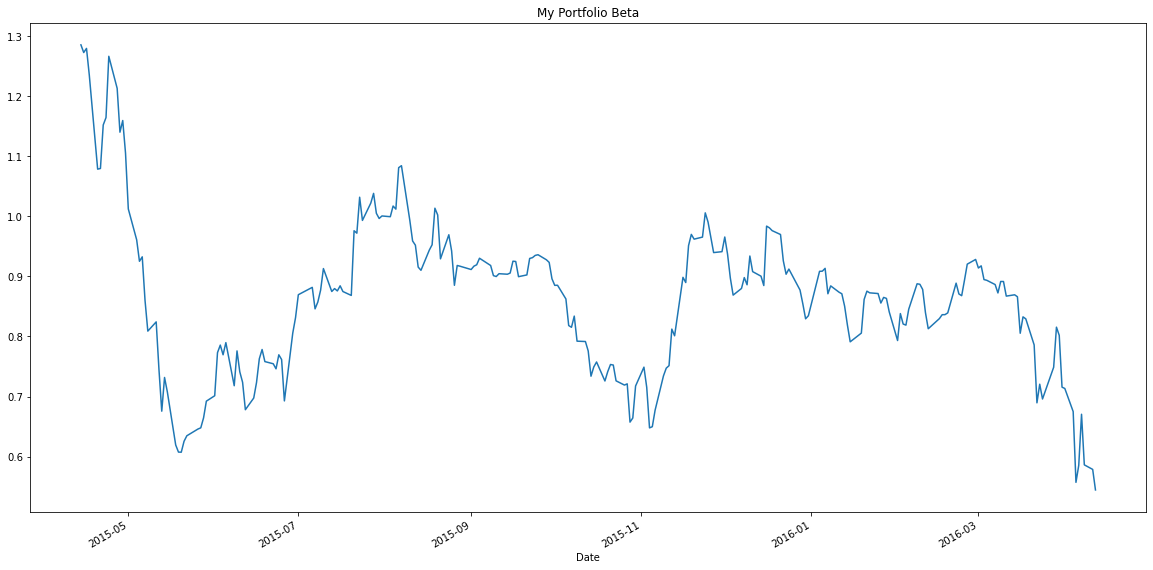

In [42]:
# Beta
varSP = all_pfolios['SPReturns'].rolling(window = 30).var()
cov_mpfolio = all_pfolios['My Portfolio'].rolling(window = 30).cov(all_pfolios['SPReturns'])
beta_mpfolio = cov_mpfolio/varSP
beta_mpfolio.plot(figsize=(20, 10), title = 'My Portfolio Beta')